In [126]:
import keras
import keras.backend as K

In [4]:
from keras.datasets import mnist

In [132]:
(x_train,y_train) ,(x_test ,y_test)=mnist.load_data()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

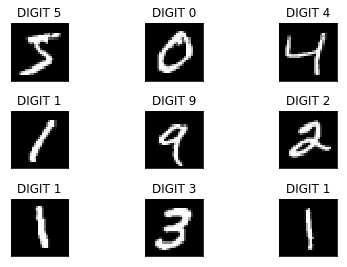

In [17]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap="gray" ,interpolation=None)
    plt.title("DIGIT {}" .format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    

In [133]:
x_train.shape

(60000, 28, 28)

In [129]:
K.image_data_format()

'channels_last'

In [145]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [146]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [147]:
x_train/=255
x_test/=255

In [148]:
x_train.shape

(60000, 28, 28, 1)

In [149]:
x_test.shape

(10000, 28, 28, 1)

In [150]:
from keras.utils import to_categorical

In [151]:
num_category=10
y_train=to_categorical(y_train ,num_category)
y_test=to_categorical(y_test ,num_category)

Model Building

In [152]:
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPool2D ,Flatten ,Dense,Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import adam

In [183]:
model=Sequential()

In [184]:
model.add(Conv2D(32 ,kernel_size=(3,3),activation=keras.activations.relu,input_shape=(28,28,1)))

In [185]:
model.add(Conv2D(64 ,(3,3), activation="relu" ))

In [186]:
model.add(MaxPool2D((2,2)))

In [187]:
model.add(Dropout(0.25))

In [188]:
model.add(Flatten())

In [189]:
model.add(Dense(128,activation="relu"))

In [190]:
model.add(Dropout(0.5))

In [191]:
model.add(Dense(num_category ,activation="softmax"))

In [192]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Training the Model

In [182]:
model_log=model.fit(x_train ,y_train ,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
 2304/60000 [>.............................] - ETA: 5:40 - loss: 1.3549 - acc: 0.5660

KeyboardInterrupt: 

In [50]:
score=model.evaluate(x_test ,y_test,verbose=1)

10000/10000 [==============================] - 12s 1ms/step


In [51]:
score

[0.02707700574474411, 0.9919]

In [52]:
score[0]#test loss

0.02707700574474411

In [53]:
score[1]#test accuracy

0.9919

In [54]:
model.save("digit_model.h5")
print("model saved successfully")

model saved successfully


In [167]:
from keras.preprocessing import image
import numpy as np
import cv2

In [193]:
model.load_weights("digit_model.h5")

In [194]:
cls=model.predict(x_test)

In [195]:
cls=np.argmax(cls,axis=1)

In [196]:
cls

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)